In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sunpy.visualization.colormaps import color_tables as cm_tables
import astropy.units as u




In [3]:
aia = np.load("/Volumes/T9/FOXES_Data/AIA/test/2024-03-23T01:22:00.npy")

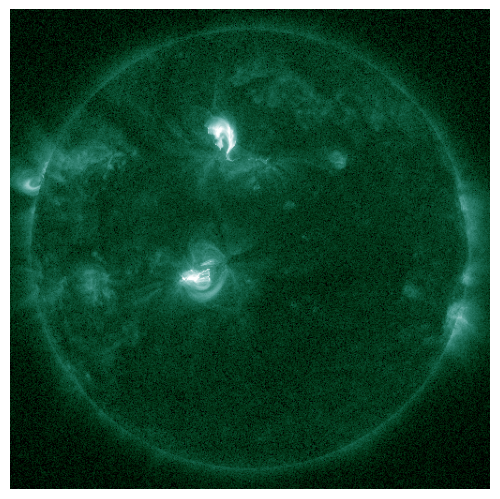

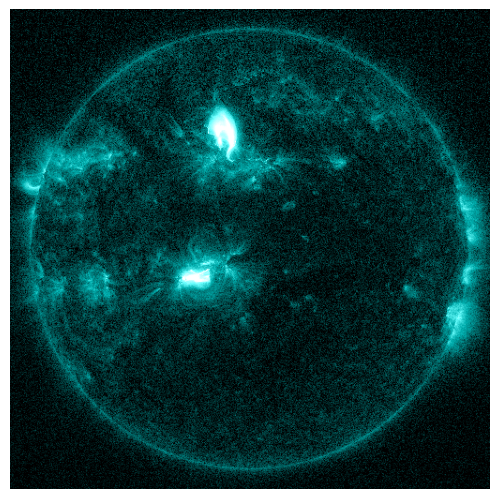

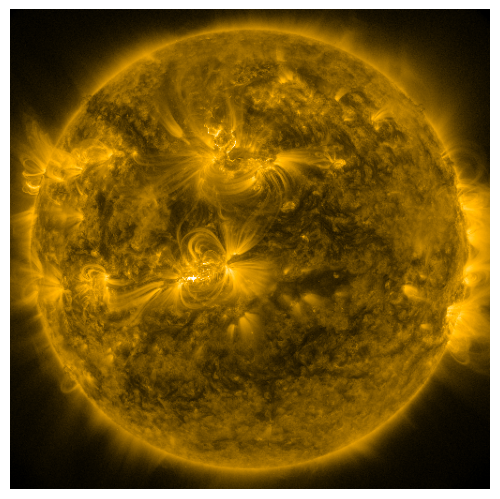

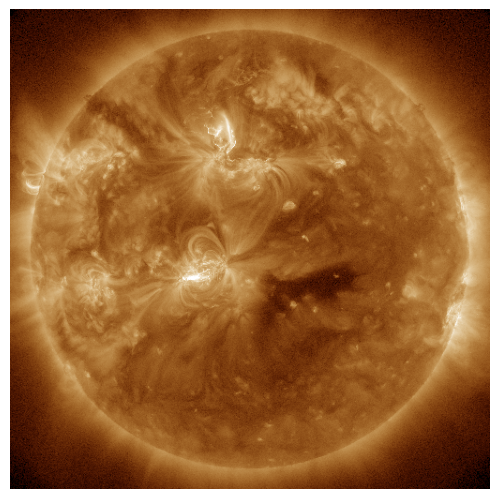

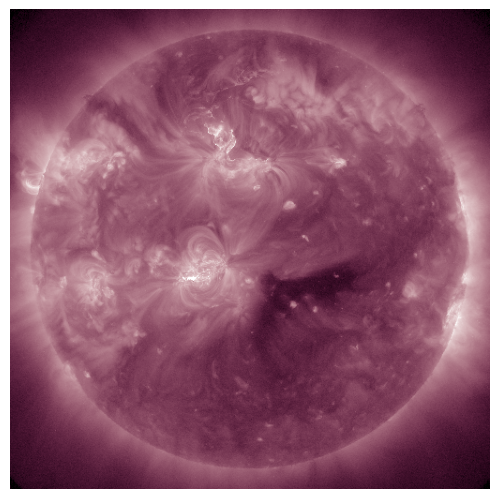

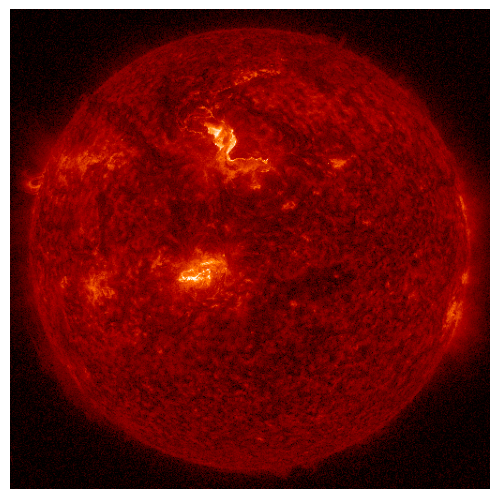

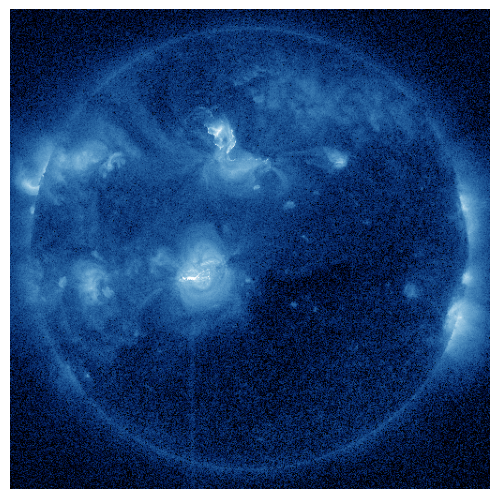

In [8]:
wavelengths = [94, 131, 171, 193, 211, 304, 335]

for i,wavelength in enumerate(wavelengths):
    plt.imshow(aia[i], cmap=cm_tables.aia_color_table(wavelength*u.angstrom), origin="lower")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    #plt.gca().set_xlim([0, aia[1].shape[1]])
    #plt.gca().set_ylim([aia[1].shape[0], 0])
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.gcf().patch.set_facecolor('none')
    plt.show()


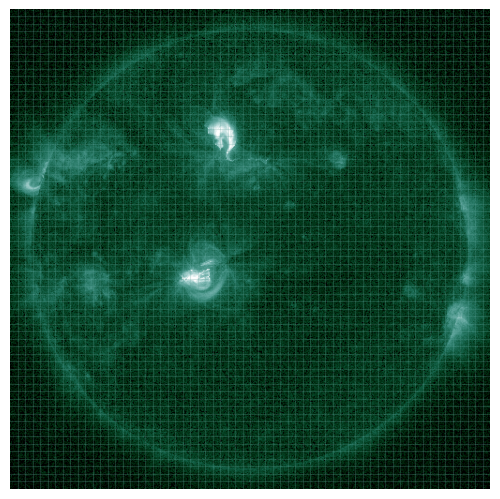

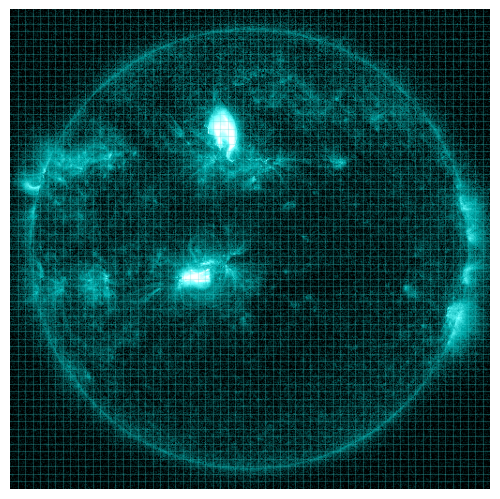

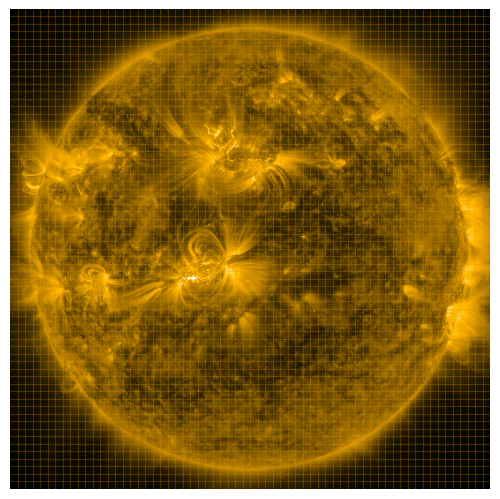

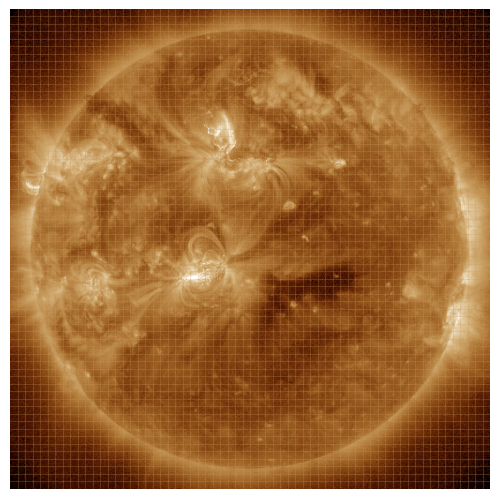

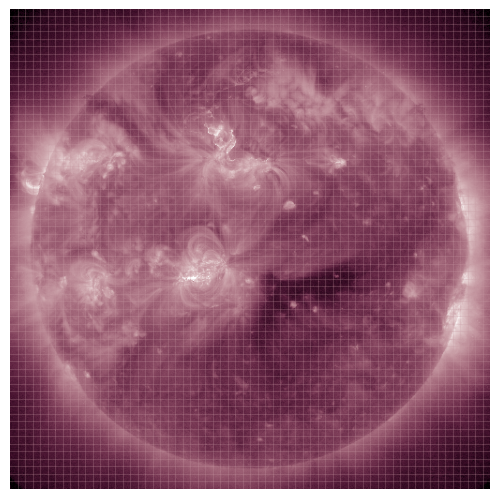

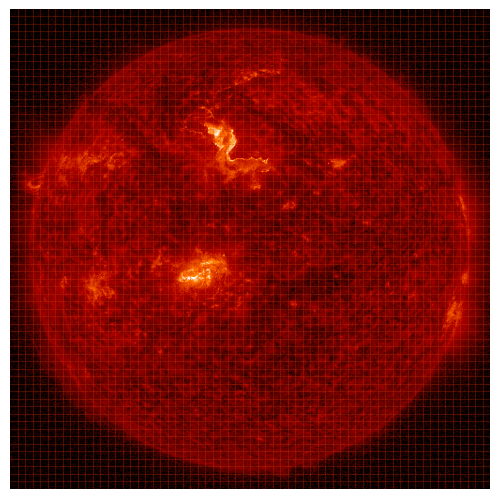

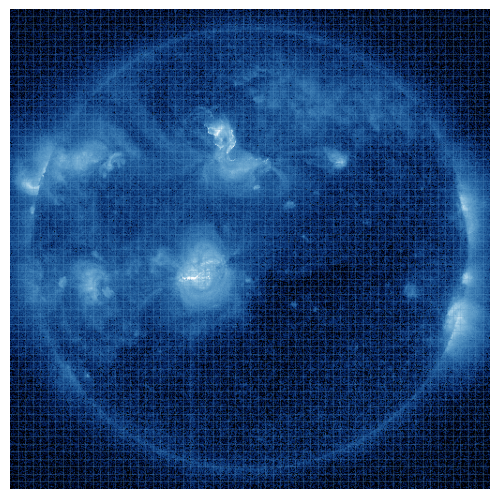

In [16]:
for i,wavelength in enumerate(wavelengths):

    plt.imshow(aia[i], cmap=cm_tables.aia_color_table(wavelength*u.angstrom), origin="lower")
    #plt.imshow(aia[i], cmap="grey", origin="lower")
    plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    #plt.gca().set_xlim([0, aia[1].shape[1]])
    #plt.gca().set_ylim([aia[1].shape[0], 0])
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.gcf().patch.set_facecolor('none')


    # Overlay a 16x16 grid
    h, w = aia[1].shape
    num_cells = 64

    # Compute the main color for each wavelength from its colormap, 
    # then slightly shift the hue for the grid
    base_cmap = cm_tables.aia_color_table(wavelength*u.angstrom)
    # Sample the colormap at the mid intensity for the base color
    base_rgb = np.array(base_cmap(0.6))[:3]
    # Convert to HSV, shift hue, and back to RGB to offset (slight shift)
    import colorsys
    #h0, s0, v0 = colorsys.rgb_qto_hsv(*base_rgb)
    #grid_hue = (h0 + 0.10) % 1.0  # Offset hue by 0.10
    grid_rgb = colorsys.hsv_to_rgb(grid_hue, s0, v0)
    #grid_rgb = 'lightblue'
    for j in range(1, num_cells):
        plt.axvline(x=j*w/num_cells, color=np.array(base_cmap(0.6)), lw=0.8, alpha=0.25)
        plt.axhline(y=j*h/num_cells, color=np.array(base_cmap(0.6)), lw=0.8, alpha=0.25)
    plt.savefig(f"{wavelength}.png", bbox_inches='tight', pad_inches=0)
    plt.show()


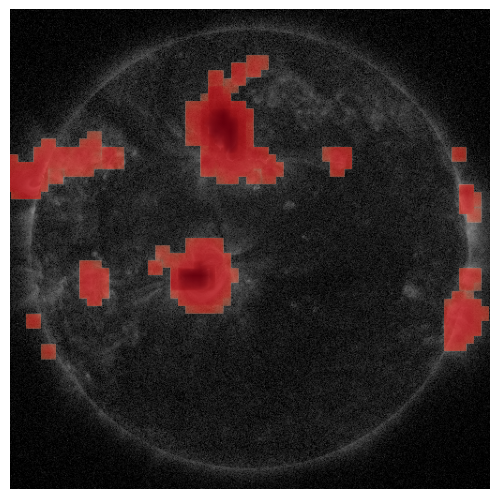

In [36]:
from scipy.ndimage import zoom
import matplotlib as mpl

att = np.loadtxt("/Volumes/T9/FOXES_Data/batch_results/vit/flux/2024-03-23T01:22:00", delimiter=",")
plt.imshow(aia[0], cmap="gray", origin="lower")
plt.axis('off')
plt.xticks([])
plt.yticks([])
#plt.gca().set_xlim([0, aia[1].shape[1]])
#plt.gca().set_ylim([aia[1].shape[0], 0])
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.gcf().patch.set_facecolor('none')

# # Overlay a 16x16 grid
# h, w = aia[1].shape
# num_cells = 64
# for i in range(1, num_cells):
#     # Vertical lines
#     plt.axvline(x=i*w/num_cells, color='cadetblue', lw=0.8, alpha=0.35)
#     # Horizontal lines
#     plt.axhline(y=i*h/num_cells, color='cadetblue', lw=0.8, alpha=0.35)

target_shape = [512, 512]
zoom_factors = (target_shape[0] / 64, target_shape[1] / 64)
att = zoom(att, zoom_factors, order=1)

# Use LogNorm to normalize the attention map on a log scale
norm = mpl.colors.LogNorm(vmin=att.min(), vmax=att.max())

# Create an RGBA image with a Reds colormap and alpha set to the (normalized) attention values
cmap = mpl.cm.Reds
rgba_att = cmap(norm(att))
rgba_att[..., 3] = norm(att)  # set alpha channel from 0 (transparent) to 1 (red) by attention value
im = plt.imshow(rgba_att, origin="lower")
#cbar = plt.colorbar(im, label='Flux (log scale)', cmap=cmap)
plt.savefig("flux_map.png", bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
# Extract and show a single 32x32 patch

h, w = aia[1].shape
num_cells = 32
patch_h = h // num_cells
patch_w = w // num_cells

# For example, select the (10, 10)-th patch (arbitrary choice)
i, j = 15, 12
patch = aia[1][i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]

plt.figure(figsize=(3,3))
plt.imshow(patch, cmap='gray')
plt.axis('off')
plt.title(f'Patch ({i},{j})')
plt.show()

In [ ]:
# Extract and show a row of 32x32 patches with black background and white text
# Use colormap normalization from the entire image, show patches, and set origin='lower' (correct orientation)
aia = np.load("/mnt/data/AIA_processed/AIA/2024-03-23T01:22:00.npy")
h, w = aia[1].shape
# Make image so that [0, 0] is the bottom left of the array

aia_fixed = np.flipud(aia[1])  # flip vertically, then horizontally
num_cells = 32
patch_h = h // num_cells
patch_w = w // num_cells

global_vmin = aia[1].min()
global_vmax = aia[1].max()

num_to_show = 32
start_j = 0

for i in range(0, 32):
    fig, axes = plt.subplots(1, num_to_show, figsize=(num_to_show * 2.2, 2.2), facecolor='black')
    for idx, j in enumerate(range(start_j, start_j + num_to_show)):
        #patch = aia[1][i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]
        patch = aia_fixed[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]
        axes[idx].imshow(patch, cmap='gray', vmin=global_vmin, vmax=global_vmax,)
        axes[idx].axis('off')
        axes[idx].set_facecolor('black')
        axes[idx].set_title(f"({i},{j})", fontsize=10, color='white')

    plt.tight_layout()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

In [ ]:
# Extract and show a row of 32x32 patches with black background and white text
# Use colormap normalization from the entire image, show patches, and set origin='lower' (correct orientation)
aia = np.load("/mnt/data/AIA_processed/AIA/2024-03-23T01:22:00.npy")
h, w = aia[1].shape
# Make image so that [0, 0] is the bottom left of the array

  # flip vertically, then horizontally
num_cells = 32
patch_h = h // num_cells
patch_w = w // num_cells



num_to_show = 8
start_j = 11

for w, wavelength in enumerate(wavelengths):
    fig, axes = plt.subplots(num_to_show, 1, figsize=(11, num_to_show*1.1), facecolor='black')
    aia_fixed = np.flipud(aia[w])
    global_vmin = aia[w].min()
    global_vmax = aia[w].max()
    i=8
    for idx, j in enumerate(range(start_j, start_j + num_to_show)):
        #patch = aia[1][i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]
        patch = aia_fixed[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]
        axes[idx].imshow(patch, cmap=cm_tables.aia_color_table(wavelength*u.angstrom), vmin=global_vmin, vmax=global_vmax,)
        axes[idx].axis('off')
        axes[idx].set_facecolor('black')
        #axes[idx].set_title(f"({i},{j})", fontsize=10, color='white')

    plt.tight_layout()
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.show()

In [ ]:
# Show the flattened version of each selected patch, 
# but now BUILD UP the plot at each wavelength (so for each wavelength, show the plot with all lines so far)

import matplotlib.pyplot as plt

aia = np.load("/mnt/data/AIA_processed/AIA/2024-03-23T01:22:00.npy")
h, w = aia[1].shape

num_cells = 32
patch_h = h // num_cells
patch_w = w // num_cells

num_to_show = 8
start_j = 11

# Helper function: get the primary color from a colormap (at the midpoint, or another relevant value)
def get_primary_color(cmap, vmin, vmax):
    # Get color in the middle of the normalization range
    normed = 0.5 if vmax > vmin else 0
    return cmap(normed)

i = 8  # fixed row

# Pre-calculate y global limits for all patches and wavelengths to keep axis fixed
patch_min, patch_max = [], []
for w in range(len(wavelengths)):
    aia_fixed = np.flipud(aia[w])
    for j in range(start_j, start_j + num_to_show):
        patch = aia_fixed[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]
        patch_flat = patch.flatten()
        patch_min.append(patch_flat.min())
        patch_max.append(patch_flat.max())
fixed_ylim_min = min(patch_min)
fixed_ylim_max = max(patch_max)

# For each step in wavelengths, show the plot "building up"
for w_build, wavelength_build in enumerate(wavelengths):
    fig, axes = plt.subplots(num_to_show, 1, figsize=(11, num_to_show*1.1), facecolor='black', sharex=True)
    if num_to_show == 1:
        axes = [axes]

    for idx, j in enumerate(range(start_j, start_j + num_to_show)):
        ax = axes[idx]
        # Draw all lines up to wavelength w_build (inclusive)
        for w, wavelength in enumerate(wavelengths[:w_build+1]):
            aia_fixed = np.flipud(aia[w])
            patch = aia_fixed[i*patch_h:(i+1)*patch_h, j*patch_w:(j+1)*patch_w]
            patch_flat = patch.flatten()
            global_vmin = aia[w].min()
            global_vmax = aia[w].max()
            cmap = cm_tables.aia_color_table(wavelength*u.angstrom)
            primary_color = get_primary_color(cmap, global_vmin, global_vmax)
            label = f"{wavelength} Å" if idx == 0 else None
            ax.plot(patch_flat, color=primary_color, label=label, linewidth=2)
        
        ax.set_facecolor('black')
        # Remove xticklabels except last subplot
        if idx < num_to_show-1:
            ax.set_xticklabels([])
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.set_ylim(fixed_ylim_min, fixed_ylim_max)  # Set fixed y-axis for each subplot

    plt.xlabel("Patch pixel index", color='white')
    #plt.tight_layout()
    plt.subplots_adjust(left=0.05, right=0.98, top=0.98, bottom=0.05)
    plt.show()